In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
RAW_DATA_PATH = "../data/raw/2020/survey_results_public.csv"

In [3]:
raw_df = pd.read_csv(RAW_DATA_PATH)
raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


# Data Analysis

In [4]:
# The portion of students in the dataset 
# Student is not a job. We will delete this DevType 

students_df = raw_df[raw_df['DevType'] == 'Student']

print("Portion of students in the dataset: ")
print(f".. {students_df.shape[0] / raw_df.shape[0] * 100:.2f}%")

Portion of students in the dataset: 
.. 0.00%


In [6]:
unique_main_branch = raw_df['MainBranch'].unique()
print(f"unique_main_branch: \n{unique_main_branch}")

unique_main_branch: 
['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]


In [7]:
# How many developers code as a hobby

PRO_MAIN_BRANCH = ["I am a developer by profession", 
                   "I am not primarily a developer, but I write code sometimes as part of my work/studies", 
                   "I used to be a developer by profession, but no longer am"
                   ]

portion_sum = 0
for branch in PRO_MAIN_BRANCH:
    print(f"Portion of {branch} in the dataset")
    print(f".. {branch}: {raw_df[raw_df['MainBranch'] == branch].shape[0] / raw_df.shape[0] * 100:.2f}%")
    portion_sum += raw_df[raw_df['MainBranch'] == branch].shape[0] / raw_df.shape[0] * 100
    
print(f"------------------------------------------")
print(f"The sum of these portions is: {portion_sum:.2f}%")
print(f"The portion of people who code as a hobby: {(100 - portion_sum):.2f}%")

Portion of I am a developer by profession in the dataset
.. I am a developer by profession: 73.21%
Portion of I am not primarily a developer, but I write code sometimes as part of my work/studies in the dataset
.. I am not primarily a developer, but I write code sometimes as part of my work/studies: 0.00%
Portion of I used to be a developer by profession, but no longer am in the dataset
.. I used to be a developer by profession, but no longer am: 1.84%
------------------------------------------
The sum of these portions is: 75.05%
The portion of people who code as a hobby: 24.95%


These values insure as that the dataset could be used in our business case. 
- We have only 7% of students in the dataset
- Among professionals, we have 76% of developers that write code as part of their job and only 11% of programmers that code as a hobby
These values indicates that the tech stacks will be correlated with the DevType. In addition, they reflect a real relationship.

In [8]:
FEATS = ["DatabaseWorkedWith", 
         "LanguageWorkedWith", 
         "MiscTechWorkedWith", 
         "NEWCollabToolsWorkedWith", 
         "PlatformWorkedWith", 
         "WebframeWorkedWith"
         ]

LABEL = ["DevType"]

OTHER_FEATS = []
for feature in raw_df.columns:
    if feature not in FEATS + LABEL:
        OTHER_FEATS.append(feature)
        
raw_df[OTHER_FEATS].sample(1).iloc[0]


Respondent                                                                  43239
MainBranch                                 I am a student who is learning to code
Hobbyist                                                                       No
Age                                                                           NaN
Age1stCode                                                                     18
CompFreq                                                                      NaN
CompTotal                                                                     NaN
ConvertedComp                                                                 NaN
Country                                                                     India
CurrencyDesc                                                                  NaN
CurrencySymbol                                                                NaN
DatabaseDesireNextYear                       MariaDB;Microsoft SQL Server;MongoDB
EdLevel         

## Employment

In [9]:
employement_unique_values = raw_df['Employment'].unique()
print(f"employement_unique_values: \n{employement_unique_values}")

employement_unique_values: 
['Independent contractor, freelancer, or self-employed'
 'Employed full-time' nan 'Student' 'Not employed, but looking for work'
 'Employed part-time' 'Retired' 'Not employed, and not looking for work']


In [23]:
for el in employement_unique_values: 
    print(f"{el}, {type(el)} | {str(el)}, {type(str(el))}")

Independent contractor, freelancer, or self-employed, <class 'str'> | Independent contractor, freelancer, or self-employed, <class 'str'>
Employed full-time, <class 'str'> | Employed full-time, <class 'str'>
nan, <class 'float'> | nan, <class 'str'>
Student, <class 'str'> | Student, <class 'str'>
Not employed, but looking for work, <class 'str'> | Not employed, but looking for work, <class 'str'>
Employed part-time, <class 'str'> | Employed part-time, <class 'str'>
Retired, <class 'str'> | Retired, <class 'str'>
Not employed, and not looking for work, <class 'str'> | Not employed, and not looking for work, <class 'str'>


In [30]:
employement_unique_values_count = []
for emp_type in employement_unique_values:
    if str(emp_type) != "nan": 
        employement_count = raw_df[raw_df['Employment'] == emp_type].shape[0]
        employement_unique_values_count.append(employement_count)
    else : 
        employement_unique_values_count.append(raw_df['Employment'].isna().sum())

# employement_unique_values_count.append(raw_df['Employment'].isna().sum())

emloyement_count_df = pd.DataFrame([employement_unique_values, employement_unique_values_count]).T
emloyement_count_df.columns = ['Employment', 'Frequency']
emloyement_count_df

,Employment,Frequency
0,"Independent contractor, freelancer, or self-em...",5672
1,Employed full-time,45270
2,NaN,607.0
3,Student,7787
4,"Not employed, but looking for work",2343
5,Employed part-time,2217
6,Retired,243
7,"Not employed, and not looking for work",322


In [29]:
# sanity check 
print(f"employement_unique_values length : {employement_unique_values.shape[0]}")
print(f"emloyement_count_df shape : {emloyement_count_df.shape}")

print(f"-----------------------------------------------------")
freq_sum = emloyement_count_df['Frequency'].sum()
raw_df_shape = raw_df.shape[0]

print(f"Sum of frequency values: {freq_sum}")
print(f"raw_shape length: {raw_df_shape}")


if (employement_unique_values.shape[0] == emloyement_count_df.shape[0]) and (freq_sum == raw_df_shape): 
    print(f".. Sanity check passed. ")
else: 
    print(f".. Sanity check failed. ")

employement_unique_values length : 8
emloyement_count_df shape : (8, 2)
-----------------------------------------------------
Sum of frequency values: 64461.0
raw_shape length: 64461
.. Sanity check passed. 


Text(0.5, 1.0, 'Employment Frequency Distribution')

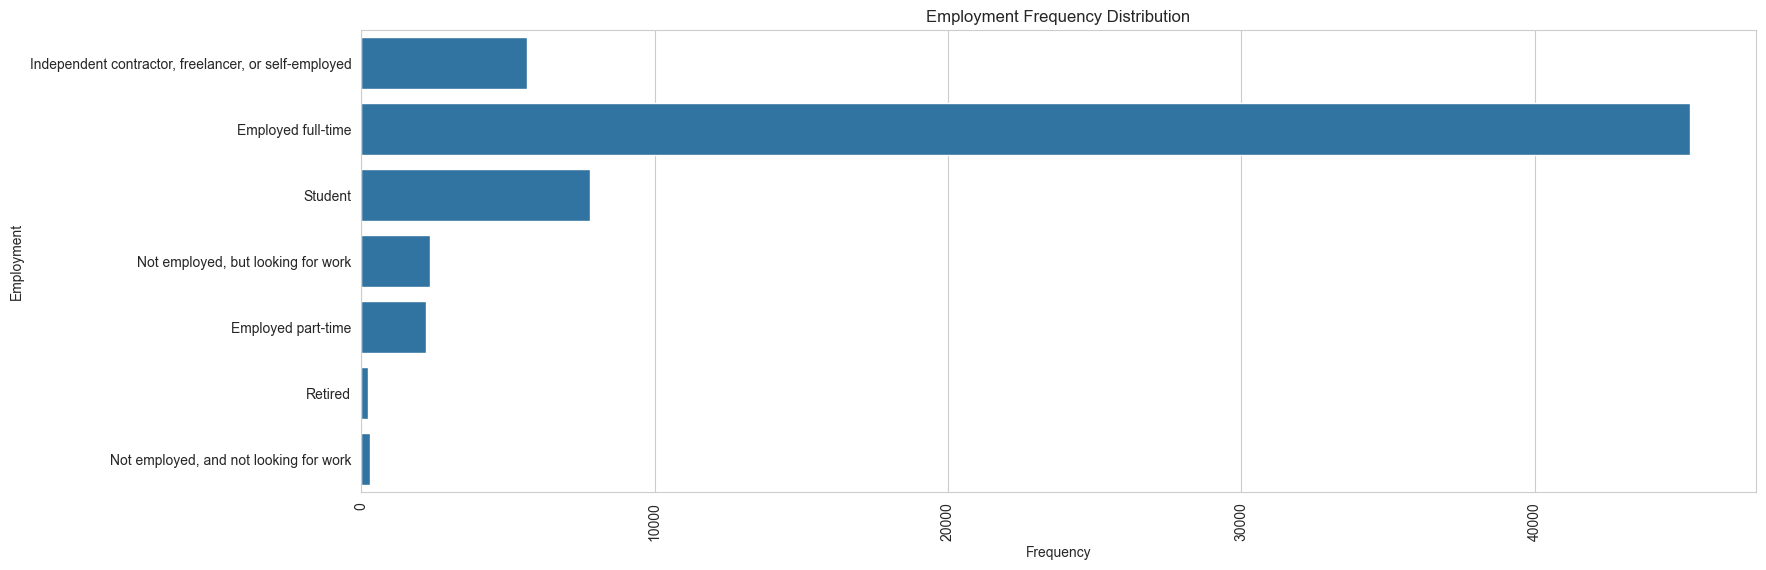

In [14]:
# plot emloyement_count_df

plt.figure(figsize=(18, 6))
plt.xticks(rotation=90)
sns.barplot(y=emloyement_count_df['Employment'], 
            x=emloyement_count_df['Frequency'], 
            data=emloyement_count_df)
plt.title("Employment Frequency Distribution")

Text(0.5, 1.0, 'Most Frequent Employment Frequency Distribution')

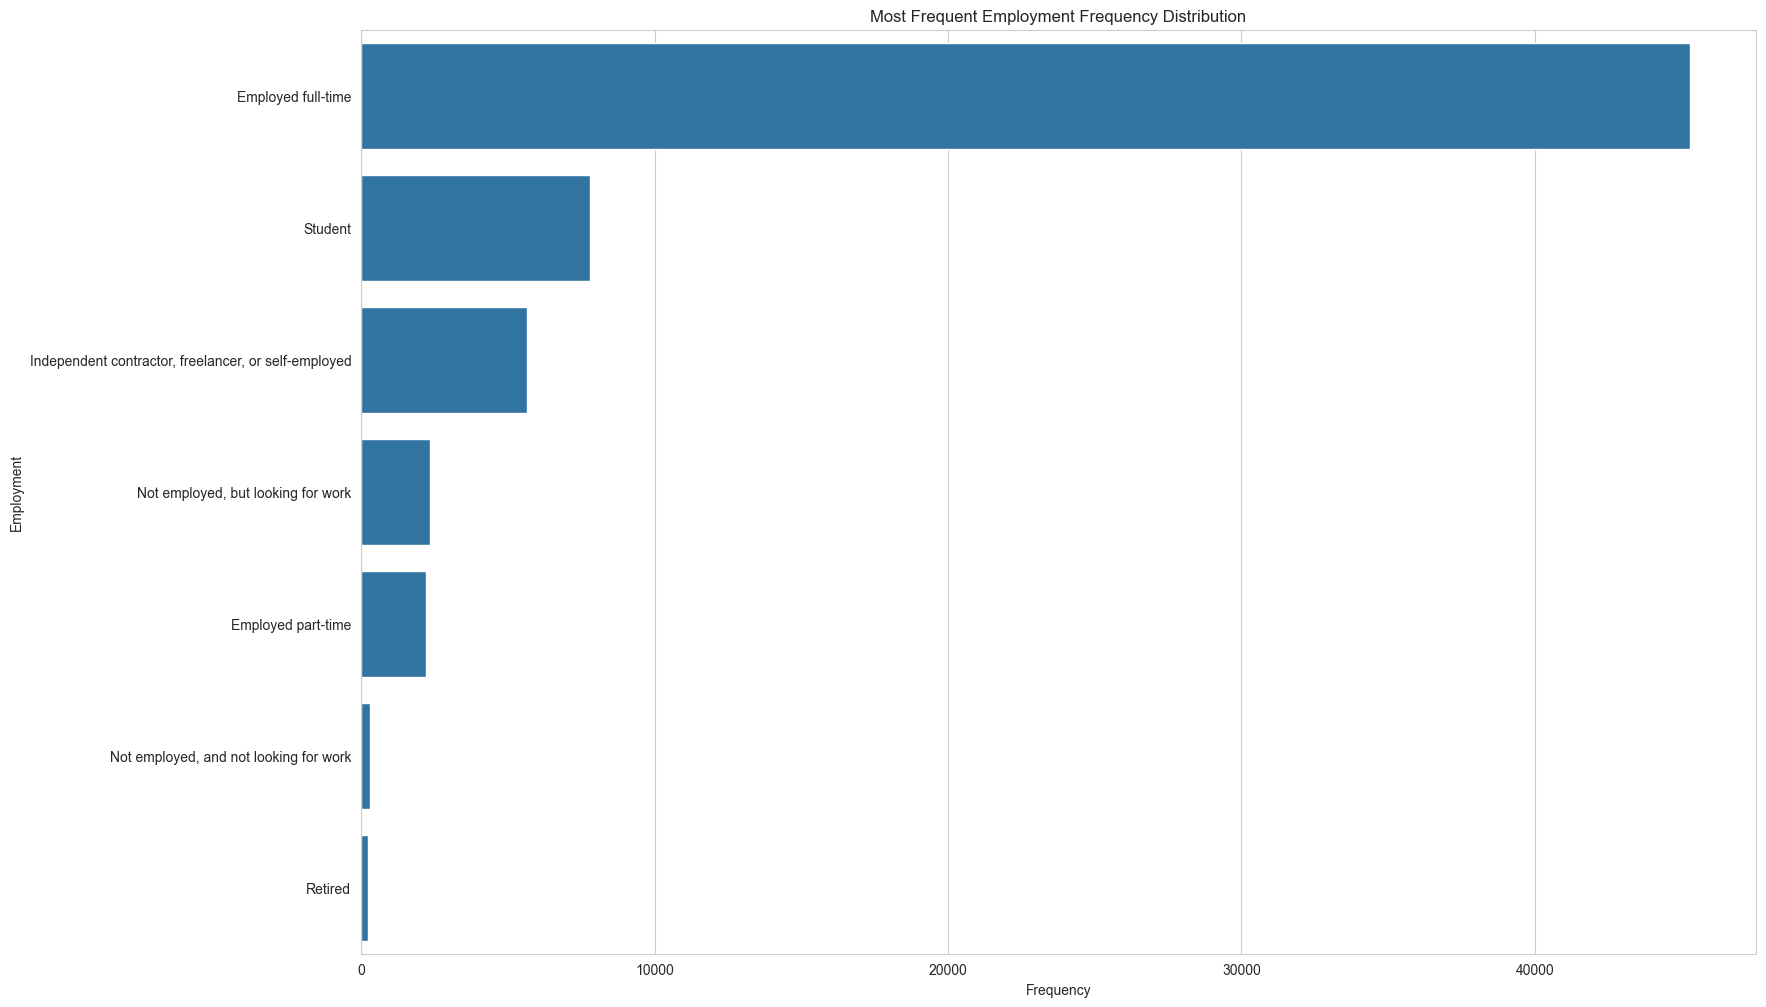

In [15]:
# Most frequency Employments 
freq_employments = emloyement_count_df.sort_values(by='Frequency', ascending=False)[0:22]
plt.figure(figsize=(18, 12))
sns.barplot(y=freq_employments['Employment'], 
            x=freq_employments['Frequency'], 
            data=freq_employments)
plt.title("Most Frequent Employment Frequency Distribution")

In [16]:
# Number and portion of responses from employed people
nbr_employed = raw_df[(raw_df['Employment'].str.contains('Employed, full-time')) | (raw_df['Employment'].str.contains('Employed, part-time'))].shape[0]
print(f"Number of answers from employed people: {nbr_employed}")
print(f"Portion of employed people in the survey: {nbr_employed / raw_df.shape[0] * 100:.2f}%")

Number of answers from employed people: 0
Portion of employed people in the survey: 0.00%


In [45]:
 # Number and portion of retired people 
 nbr_retired = raw_df[(raw_df['Employment'] == 'Retired') | (raw_df['Employment'] == 'Employed, part-time')].shape[0]
print(f"Number of answers from retired people: {nbr_retired}")
print(f"Portion of retired people in the survey: {nbr_retired / raw_df.shape[0] * 100:.2f}%")

Number of answers from retired people: 1791
Portion of retired people in the survey: 2.74%


## Educational Level

In [51]:
edLevel_unique_values = raw_df['EdLevel'].unique()
edLevel_unique_values

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [99]:
# Calculate the EdLevels Frequency
edLevel_unique_values_count = []
for value in edLevel_unique_values:
    if str(value) != str(edLevel_unique_values[-1]):
        print(f"value : {value}")
        edLevel_count = raw_df[raw_df['EdLevel'] == value].shape[0]
        edLevel_unique_values_count.append(edLevel_count)
    
edLevel_count = raw_df['EdLevel'].isna().sum()
edLevel_unique_values_count.append(edLevel_count)
edLevel_count_df = pd.DataFrame([edLevel_unique_values, edLevel_unique_values_count]).T
edLevel_count_df.columns = ['EdLevel', 'Frequency']
edLevel_count_df

value : Primary/elementary school
value : Bachelor’s degree (B.A., B.S., B.Eng., etc.)
value : Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
value : Some college/university study without earning a degree
value : Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
value : Professional degree (JD, MD, Ph.D, Ed.D, etc.)
value : Associate degree (A.A., A.S., etc.)
value : Something else


,EdLevel,Frequency
0,Primary/elementary school,1146
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557
3,Some college/university study without earning ...,7651
4,"Secondary school (e.g. American high school, G...",5793
5,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970
6,"Associate degree (A.A., A.S., etc.)",1793
7,Something else,932
8,NaN,4653.0


In [100]:
# sanity check 
print(f"EdLevel_unique_values length : {edLevel_unique_values.shape[0]}")
print(f"edLevel_count_df shape : {edLevel_count_df.shape}")

freq_sum = edLevel_count_df['Frequency'].sum()
raw_df_shape = raw_df.shape[0]

print(f"-------------------------------")
print(f"Frequency sum: {int(freq_sum)}")
print(f"raw_df_shape[0]: {int(raw_df_shape)}")


if (edLevel_unique_values.shape[0] == edLevel_count_df.shape[0]) and (freq_sum == raw_df_shape): 
    print(f".. Sanity check passed. ")
else: 
    print(f".. Sanity check failed. ")

EdLevel_unique_values length : 9
edLevel_count_df shape : (9, 2)
-------------------------------
Frequency sum: 65437
raw_df_shape[0]: 65437
.. Sanity check passed. 


Text(0.5, 1.0, 'Educational level of the population')

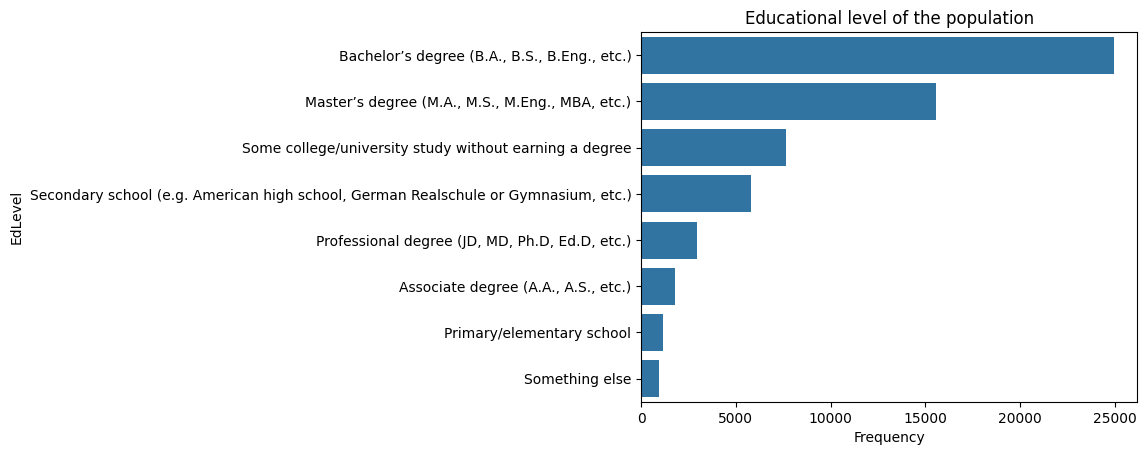

In [104]:
edLevel_count_sorted_df = edLevel_count_df.sort_values(by='Frequency', ascending=False)

sns.barplot(x=edLevel_count_sorted_df['Frequency'], y=edLevel_count_sorted_df['EdLevel'], data=edLevel_count_sorted_df)
plt.title("Educational level of the population")

In [134]:
# What is the age of people with Primary/Elementary School 
age_df = raw_df[raw_df['EdLevel'] == 'Primary/elementary school']

# calculate the age frequency
age_freq_lst = []
for age in age_df['Age'].unique() : 
    age_freq = age_df[age_df['Age'] == age].shape[0]
    age_freq_lst.append(age_freq)

age_freq_serie = pd.Series(age_freq_lst)
age_freq_df = pd.DataFrame([age_df.Age.unique().tolist(), age_freq_serie]).T
age_freq_df.columns = ['Age', 'Frequency']

# clean memory 
del age_df, age_freq_lst, age_freq_serie

age_freq_df

,Age,Frequency
0,Under 18 years old,699
1,18-24 years old,195
2,25-34 years old,107
3,35-44 years old,77
4,Prefer not to say,21
5,45-54 years old,31
6,55-64 years old,8
7,65 years or older,8


In [136]:
# sanity check 

freq_sum = age_freq_df['Frequency'].sum()
raw_df_shape = raw_df[raw_df['EdLevel'] == "Primary/elementary school"].shape[0]

print(f"-------------------------------")
print(f"Frequency sum: {int(freq_sum)}")
print(f"raw_df_shape[0]: {int(raw_df_shape)}")


if freq_sum == raw_df_shape: 
    print(f".. Sanity check passed. ")
else: 
    print(f".. Sanity check failed. ")

-------------------------------
Frequency sum: 1146
raw_df_shape[0]: 1146
.. Sanity check passed. 


Text(0.5, 1.0, 'Age frequency distribution of people with Primary/elementary school degree')

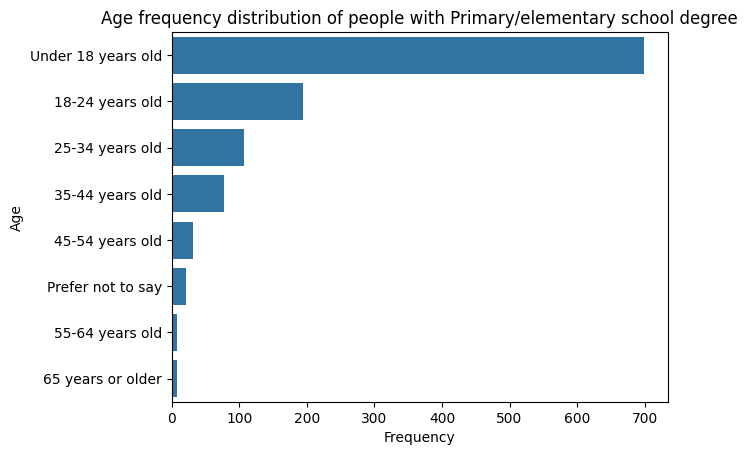

In [137]:
age_freq_sorted_df = age_freq_df.sort_values(by='Frequency', ascending=False)
sns.barplot(data= age_freq_sorted_df, x=age_freq_sorted_df['Frequency'], y=age_freq_sorted_df['Age'])
plt.title("Age frequency distribution of people with Primary/elementary school degree")

In [129]:
# What is the age of people with "Bachelor's degree (B.A., B.S., B.Eng., etc.)"
age_df = raw_df[raw_df['EdLevel'] == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]

# calculate the age frequency
age_freq_lst = []
for age in age_df['Age'].unique() : 
    age_freq = age_df[age_df['Age'] == age].shape[0]
    age_freq_lst.append(age_freq)

age_freq_serie = pd.Series(age_freq_lst)
age_freq_df = pd.DataFrame([age_df.Age.unique().tolist(), age_freq_serie]).T
age_freq_df.columns = ['Age', 'Frequency']

# clean memory 
del age_df, age_freq_lst, age_freq_serie

age_freq_df

,Age,Frequency
0,35-44 years old,5435
1,18-24 years old,5449
2,45-54 years old,2127
3,55-64 years old,879
4,25-34 years old,10736
5,Prefer not to say,59
6,65 years or older,234
7,Under 18 years old,23


In [132]:
# sanity check 

freq_sum = age_freq_df['Frequency'].sum()
raw_df_shape = raw_df[raw_df['EdLevel'] == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"].shape[0]

print(f"-------------------------------")
print(f"Frequency sum: {int(freq_sum)}")
print(f"raw_df_shape[0]: {int(raw_df_shape)}")


if freq_sum == raw_df_shape: 
    print(f".. Sanity check passed. ")
else: 
    print(f".. Sanity check failed. ")

-------------------------------
Frequency sum: 24942
raw_df_shape[0]: 24942
.. Sanity check passed. 


Text(0.5, 1.0, 'Age frequency distribution of people with Bachelor’s degree (B.A., B.S., B.Eng., etc.) degree')

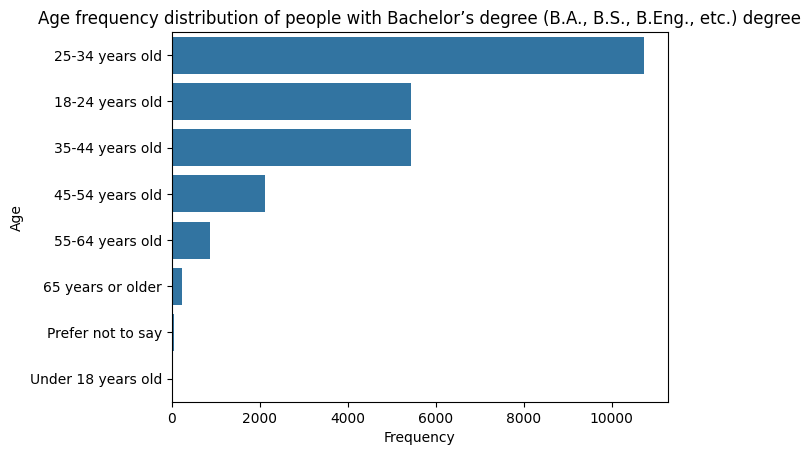

In [133]:
age_freq_sorted_df = age_freq_df.sort_values(by='Frequency', ascending=False)
sns.barplot(data= age_freq_sorted_df, x=age_freq_sorted_df['Frequency'], y=age_freq_sorted_df['Age'])
plt.title("Age frequency distribution of people with Bachelor’s degree (B.A., B.S., B.Eng., etc.) degree")

## Age 

In [124]:
# Calculate and Visualize the Age distribution independently of any other variable 

# calculate the age frequency
age_freq_lst = []
for age in raw_df['Age'].unique() : 
    age_freq = raw_df[raw_df['Age'] == age].shape[0]
    age_freq_lst.append(age_freq)

age_freq_serie = pd.Series(age_freq_lst)
age_freq_df = pd.DataFrame([raw_df.Age.unique().tolist(), age_freq_serie]).T
age_freq_df.columns = ['Age', 'Frequency']

age_freq_df

,Age,Frequency
0,Under 18 years old,2568
1,35-44 years old,14942
2,45-54 years old,6249
3,18-24 years old,14098
4,25-34 years old,23911
5,55-64 years old,2575
6,Prefer not to say,322
7,65 years or older,772


In [125]:
# sanity check 

freq_sum = age_freq_df['Frequency'].sum()
raw_df_shape = raw_df.shape[0]

print(f"-------------------------------")
print(f"Frequency sum: {int(freq_sum)}")
print(f"raw_df_shape[0]: {int(raw_df_shape)}")


if freq_sum == raw_df_shape: 
    print(f".. Sanity check passed. ")
else: 
    print(f".. Sanity check failed. ")

-------------------------------
Frequency sum: 65437
raw_df_shape[0]: 65437
.. Sanity check passed. 


Text(0.5, 1.0, 'Age frequency distribution of the population')

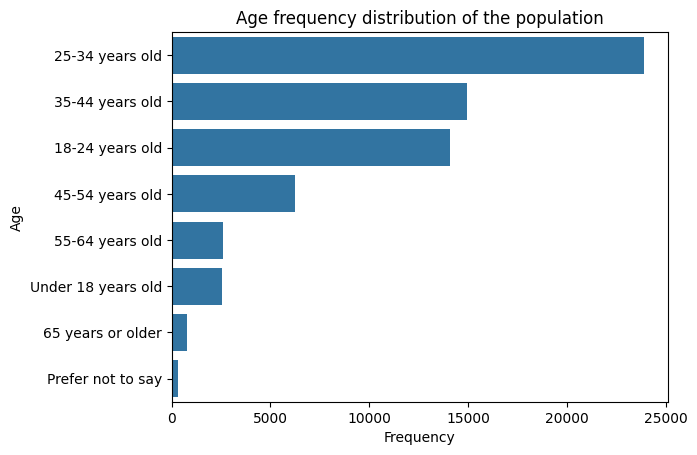

In [128]:
age_freq_sorted_df = age_freq_df.sort_values(by='Frequency', ascending=False)
sns.barplot(data= age_freq_sorted_df, x=age_freq_sorted_df['Frequency'], y=age_freq_sorted_df['Age'])
plt.title("Age frequency distribution of the population")

## YearsCodePro

- TODO : analyse this feature after data pre-processing for better insights

<Axes: xlabel='YearsCodePro', ylabel='Count'>

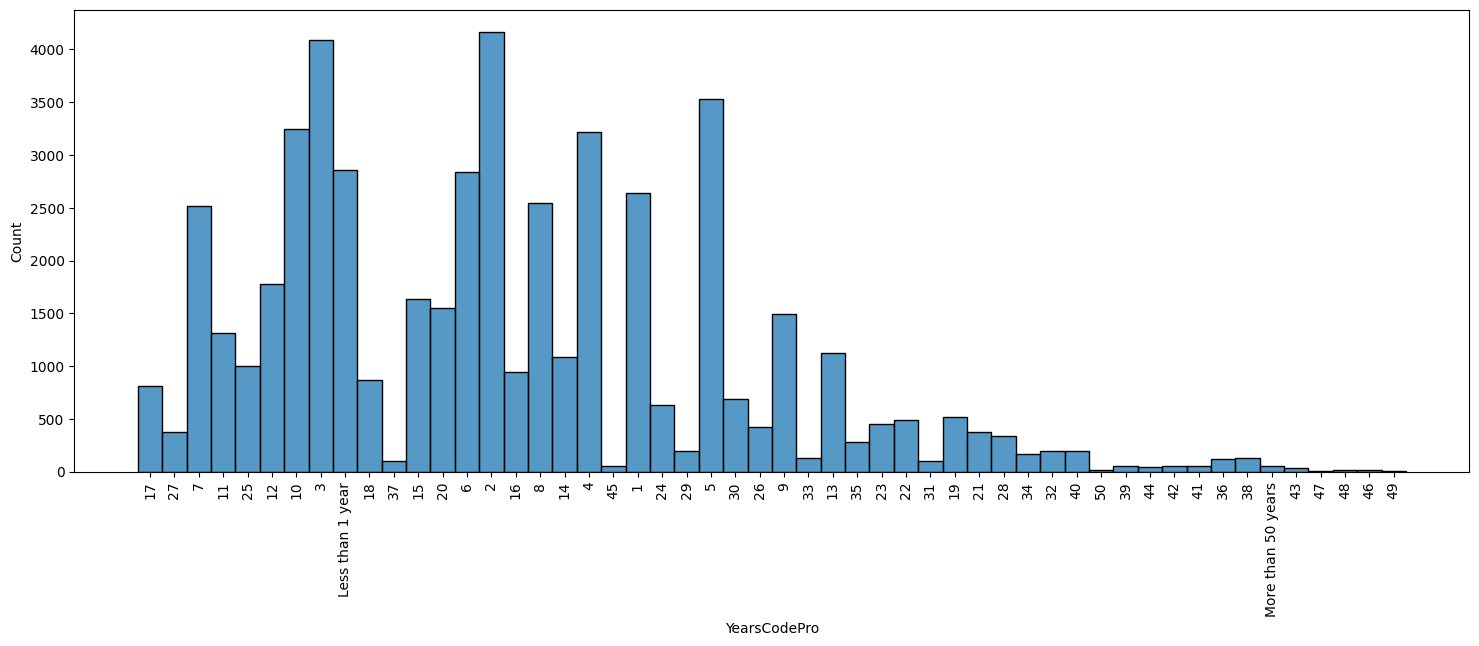

In [149]:
years_code_pro_df = raw_df.dropna(subset=['YearsCodePro'])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.histplot(data=years_code_pro_df['YearsCodePro'])

## Country

In [152]:
# Calculate and Visualize the Country distribution 

country_sorted_df = raw_df.groupby('Country')['Country'].count().sort_values(ascending=False)
country_sorted_df

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Lesotho                                                     1
Solomon Islands                                             1
Samoa                                                       1
Saint Kitts and Nevis                                       1
Papua New Guinea                                            1
Name: Country, Length: 185, dtype: int64

In [165]:
country_sorted_df = pd.DataFrame(country_sorted_df)
country_sorted_df.columns = ['Frequency']
country_sorted_df.reset_index(inplace=True)
country_sorted_df

,Country,Frequency
0,United States of America,11095
1,Germany,4947
2,India,4231
3,United Kingdom of Great Britain and Northern I...,3224
4,Ukraine,2672
...,...,...
180,Lesotho,1
181,Solomon Islands,1
182,Samoa,1
183,Saint Kitts and Nevis,1


Text(0.5, 1.0, 'Country Distribution')

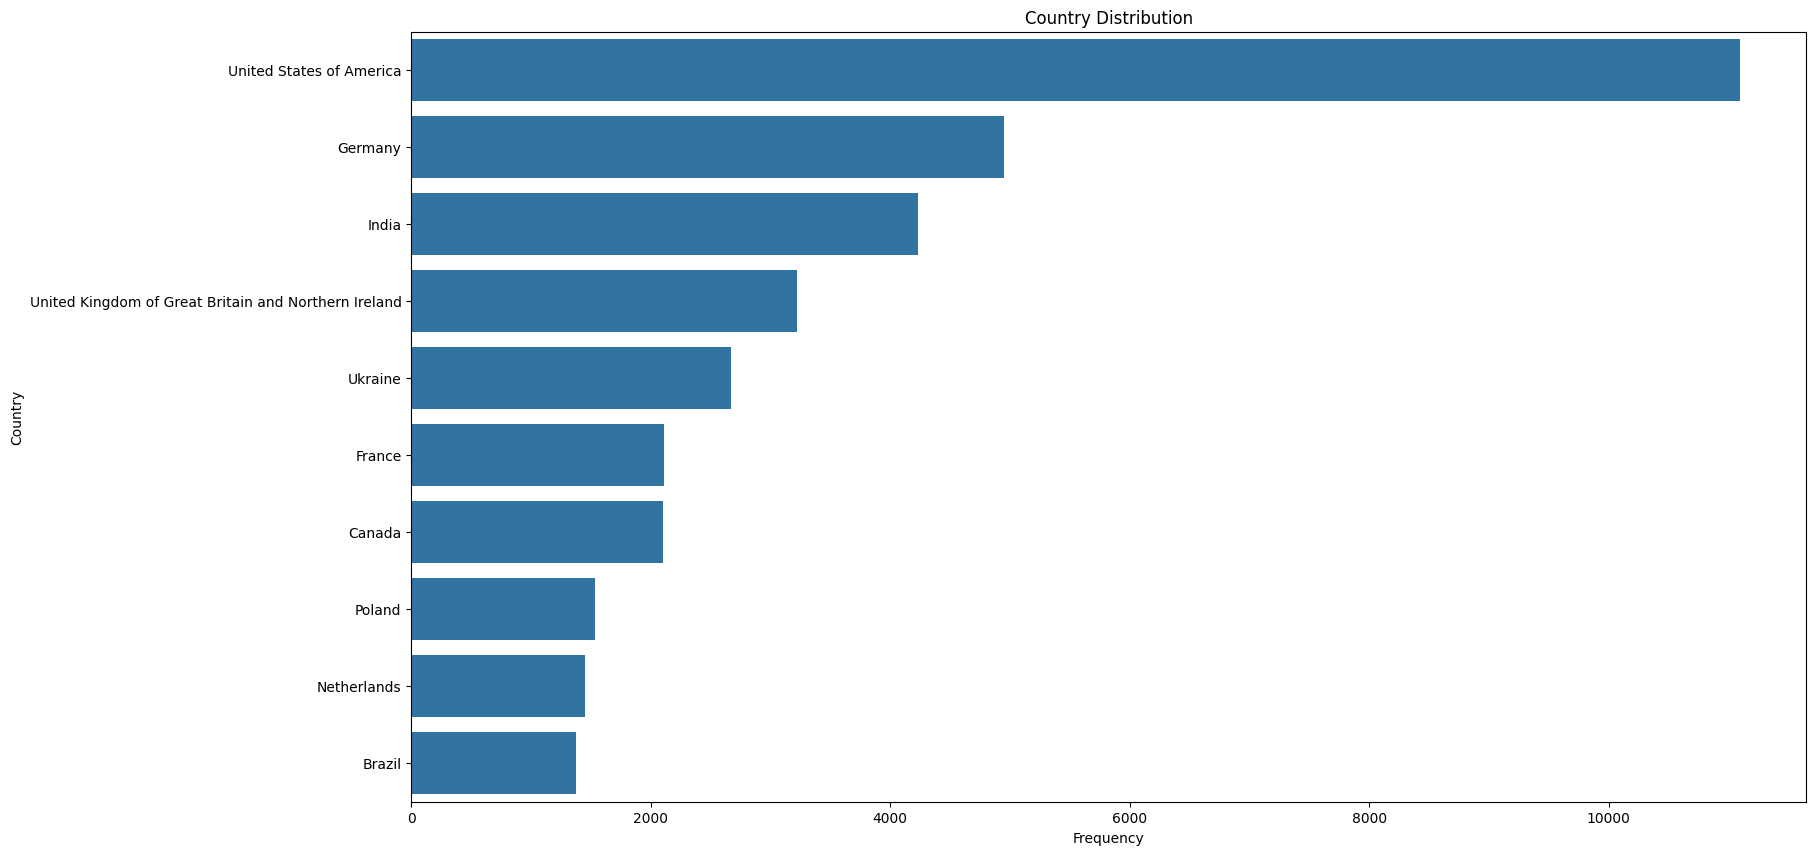

In [179]:
plt.figure(figsize=(18,10))
sns.barplot(data= country_sorted_df[:10], x=country_sorted_df[:10]['Frequency'], y=country_sorted_df[:10]['Country'])
plt.title("Country Distribution")